In [1]:
import pickle
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import mlab
import matplotlib.style
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [3]:
df_base_CDS = pd.read_csv('SDfigure.csv')
df_base_CDS = df_base_CDS.loc[:,~df_base_CDS.columns.str.contains('^Unnamed')]
df_base_CDS

,gene,ks57_reads,ks57_rpc,ks57_rpkm,ks58_reads,ks58_rpc,ks58_rpkm,ks59_reads,ks59_rpc,ks59_rpkm,...,Zhang_mmc2_Gini_30min,Zhang_mmc2_Gini_6hr,Zhang_mmc2_TE_30min,Zhang_mmc2_TE_6hr,Zhang_mmc2_Filter_vivo,Zhang_mmc2_Gini_vitro,Zhang_mmc2_Gini_ksg,Zhang_mmc2_Filter_vitro_ksg,Shape_median,Shape_seq
0,aaaD,3.0,0.029126,2.921452,2.0,0.019417,2.100146,2.0,0.019417,1.054992,...,0.843,0.940,NaN,NaN,NO,0.926,0.987,NO,NaN,NaN
1,aaaE,7.0,0.018519,1.857466,1.0,0.002646,0.286131,3.0,0.007937,0.431207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aaeA,2.0,0.006431,0.645037,1.0,0.003215,0.347773,7.0,0.022508,1.222909,...,0.639,0.782,0.000,1.698,NO,0.815,0.929,NO,NaN,NaN
3,aaeB,3.0,0.004573,0.458704,3.0,0.004573,0.494623,8.0,0.012195,0.662587,...,0.687,0.772,0.000,0.000,NO,0.825,0.934,NO,NaN,NaN
4,aaeR,76.0,0.245161,24.590456,81.0,0.261290,28.260511,88.0,0.283871,15.423305,...,0.563,0.676,0.390,0.638,NO,0.705,0.835,NO,NaN,NaN
5,aaeX,2.0,0.029412,2.950093,0.0,0.000000,0.000000,4.0,0.058824,3.196006,...,0.656,0.884,0.318,2.095,NO,0.819,0.947,NO,NaN,NaN
6,aas,165.0,0.229167,22.986145,158.0,0.219444,23.734565,235.0,0.326389,17.733393,...,0.594,0.617,0.390,1.771,NO,0.671,0.799,NO,NaN,NaN
7,aat,50.0,0.212766,21.341101,38.0,0.161702,17.489299,49.0,0.208511,11.328820,...,0.584,0.695,0.091,0.287,NO,0.657,0.805,NO,NaN,NaN
8,abgA,4.0,0.009153,0.918107,4.0,0.009153,0.990000,19.0,0.043478,2.362265,...,0.925,0.915,0.000,0.000,NO,0.970,0.985,NO,NaN,NaN
9,abgB,6.0,0.012448,1.248587,8.0,0.016598,1.795145,5.0,0.010373,0.563611,...,0.902,0.942,0.000,0.000,NO,0.965,0.985,NO,NaN,NaN


In [4]:
def reverse_complement(seq):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'} 
    bases = list(seq) 
    for base in bases:
        if base not in complement.keys():
            print "not DNA"  
    complement_bases = [complement[base] for base in bases] 
    complement_seq = ''.join(complement_bases)
    reverse_complement_seq = complement_seq[::-1] # possible to do this on list as well by reversed(list)  
    return reverse_complement_seq# Change DNA to RNA

def gff_plus_strand(gff_file):   
    with open(gff_file) as fh:
        plus_strand = ''
        flag = 0
        for line in fh:
            if line[0] == ">":
                flag = 1
                continue
            if flag == 0:
                continue
            plus_strand = plus_strand + line[:-1]
    return plus_strand 


def free_align(testing_seq, standard_seq, b, l, temp_file_name):
    ### anti-Shine-Dalgarno seq
    # NameOfTailseq: Sequence -- ReverseSequence
    # WT: aCCUCCu -- uCCUCCa
    # TM-O: aUGGGAu -- uAGGGUa
    # TM-S:aGGAGGu -- uGGAGGa
    # TM-A: aAAAAAu -- uAAAAAa

    import os

    ###### open temporary file 
    tempo_file = '/home/kazuki/^data_analysis/^Ecoli_Genome/temp_files/'+temp_file_name+'_free_align.txt'
    f = open(tempo_file,'w')
    
    ###### Calculation of deltaG and write whole output of free_align on temporary file
    free_align_commandline = 'perl free_align.pl -b '+b+' -l '+l+' '+testing_seq+' '+standard_seq+' > '+tempo_file
    os.chdir('/home/kazuki/^data_analysis/analtools/free2bind') # move just to run free_align
    os.system(free_align_commandline)
    os.chdir('/home/kazuki/^data_analysis/^Ecoli_Genome') # get back to the directory of genome anlysis
    
    ###### close temporary file 
    f.close()
    
    ###### get the delta-G value to retrun it
    with open(tempo_file) as deltaG_h:
        for dGline in deltaG_h:
            if dGline[0:5] == "Delta":
                dGline_list = dGline.split()
                energy = dGline_list[8]
                return energy

In [5]:
with open('/home/kazuki/^data_analysis/^Ecoli_Genome/Ecoli_Gene_TU.pickle','rb') as f:
    Gene_TU_dict = pickle.load(f)
    
Gene_TU_DataFrame = DataFrame.from_dict(Gene_TU_dict, orient='index')
Gene_TU_DataFrame.columns = ['strand','gene_type','gene_start','gene_end','TU','TU_start','TU_end','MorP']
Gene_TU_DataFrame

,strand,gene_type,gene_start,gene_end,TU,TU_start,TU_end,MorP
yeaN,+,CDS,1873697,1874878,NaN,NaN,NaN,NaN
xapA,-,CDS,2522067,2522900,NaN,NaN,NaN,NaN
xapB,-,CDS,2520751,2522007,NaN,NaN,NaN,NaN
galR,+,CDS,2974621,2975652,galR,2974592,2975888,Mono
rhtB,-,CDS,4006462,4007082,rhtB,4006451,4007095,Mono
yeaH,+,CDS,1866979,1868262,yeaG-yeaH,1864729,1868442,Poly
eutN,-,CDS,2569785,2570072,NaN,NaN,NaN,NaN
abrB,-,CDS,745946,746992,NaN,NaN,NaN,NaN
pabC,+,CDS,1152523,1153332,pabC-yceG-tmk-holB-ycfH-ptsG,1152505,1158562,Poly
xapR,-,CDS,2519615,2520499,xapR,2519536,2520586,Mono


In [6]:
gff = '/home/kazuki/^data_analysis/MG1655ver2/coli.gff'
plus_strand_sequence = gff_plus_strand(gff)

In [7]:
spheres = [x*5 for x in range(-7,2)]
spheres

[-35, -30, -25, -20, -15, -10, -5, 0, 5]

In [8]:
def get_deltaG_tiling(gene,rev_aSDseq,Gene_TU_dict,spheres,plus_strand_sequence,
                     strand,gene_type,gene_start,gene_end,TU,TU_start,TU_end,MorP
                     ):
    if Gene_TU_dict[gene][gene_type] != 'CDS':
        return {}
    elif type(Gene_TU_dict[gene][TU]) == float:
        return {}
    else:
        tempfile = 'freealign_temp_file'+gene  
        return_dict = {}
        if Gene_TU_dict[gene][strand]=='+':
            for a_sphere in spheres:
                seq_start = int(Gene_TU_dict[gene][gene_start])+a_sphere-1
                seq_end = int(Gene_TU_dict[gene][gene_start])+a_sphere-1+10
                seq=plus_strand_sequence[seq_start:seq_end]
                seq_dG = free_align(seq,rev_aSDseq,'0','1',tempfile)
                return_dict[str(a_sphere)]=float(seq_dG)

        if Gene_TU_dict[gene][strand]=='-':
            for a_sphere in spheres:
                seq_start = int(Gene_TU_dict[gene][gene_end])-a_sphere
                seq_end = int(Gene_TU_dict[gene][gene_end])-a_sphere-10
                revcomp_seq=plus_strand_sequence[seq_end:seq_start]
                seq=reverse_complement(revcomp_seq)
                seq_dG = free_align(seq,rev_aSDseq,'0','1',tempfile) 
                return_dict[str(a_sphere)]=float(seq_dG)

        if len(return_dict) == len(spheres):
            return return_dict

    
def gene_spheres_wrap(gene,gene_spheres):
    strand=0
    gene_type=1
    gene_start=2
    gene_end=3
    TU=4
    TU_start=5
    TU_end=6
    MorP=7

    rev_aSDseq='uCCUCCa'
    spheres = [x*5 for x in range(-10,5)]

    gene_spheres[gene] = get_deltaG_tiling(gene,rev_aSDseq,Gene_TU_dict,spheres,plus_strand_sequence,
                     strand,gene_type,gene_start,gene_end,TU,TU_start,TU_end,MorP
                     )  

In [9]:
from multiprocessing import Pool
import multiprocessing

manager = multiprocessing.Manager()
gene_spheres = manager.dict()

jobs = []
for gene in df_base_CDS['gene']:
    job = multiprocessing.Process(target=gene_spheres_wrap, args=(gene,gene_spheres))
    jobs.append(job)
    job.start()
    
#[job.join() for job in jobs] # just to get the time by the below line

In [10]:
gene_spheres_reload=gene_spheres

# Figures

1777
267
1243
267


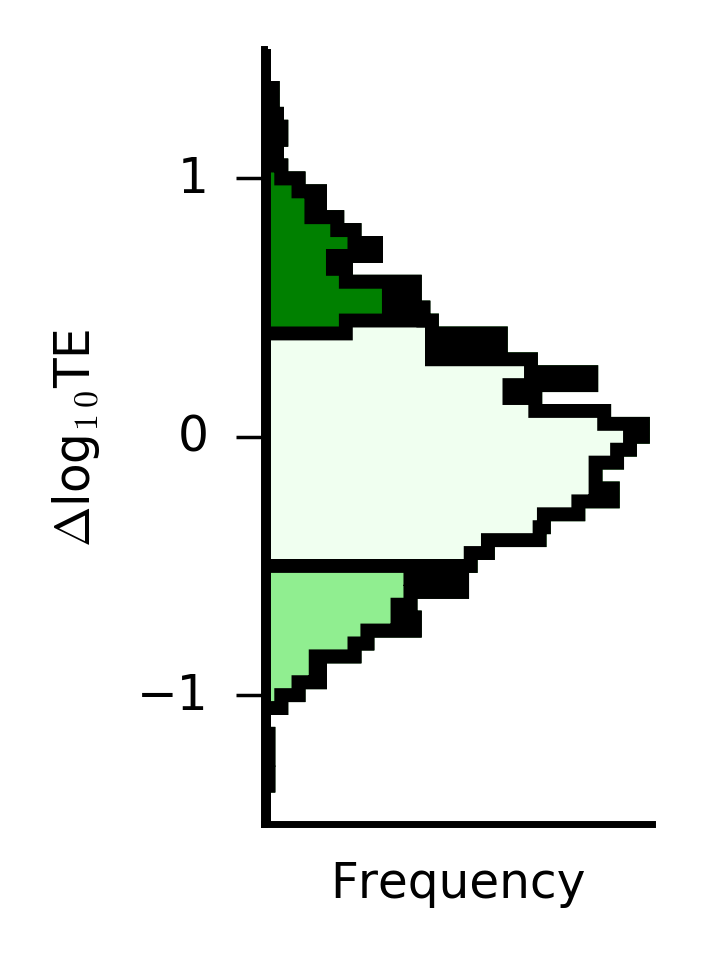

In [62]:
mut='A'
data_type = 'FD_TE_wt/'+mut
ks60_rpc = df_base_CDS['ks60_rpc'] > 0.05
ks65_rpc = df_base_CDS['ks65_rpc'] > 0.05
ks64_rpc = df_base_CDS['ks64_rpc'] > 0.05
ks68_rpc = df_base_CDS['ks68_rpc'] > 0.05

enough_rpc_df = df_base_CDS[ks60_rpc & ks65_rpc & ks64_rpc & ks68_rpc]

high_dependent = enough_rpc_df[data_type] >= enough_rpc_df[data_type].quantile(0.85)
theothers_up = enough_rpc_df[data_type] < enough_rpc_df[data_type].quantile(0.85)
theothers_bottom = enough_rpc_df[data_type] >= enough_rpc_df[data_type].quantile(0.15)
low_dependent  = enough_rpc_df[data_type] < enough_rpc_df[data_type].quantile(0.15)
print len(enough_rpc_df)
print len(enough_rpc_df[high_dependent])
print len(enough_rpc_df[theothers_up & theothers_bottom])
print len(enough_rpc_df[low_dependent])


fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(1, 2)  


distribution = enough_rpc_df[data_type].apply(np.log10).replace([np.inf,-np.inf],np.nan).dropna()
ax = sns.distplot(distribution, rug=False, norm_hist=False, vertical=True,kde=False,label=None,
                  hist=True, hist_kws={"histtype": "step", "linewidth": 2,  "alpha": 1}, 
                  color='darkgreen', bins=[y*0.05 for y in range(-600,600)])   

distribution = enough_rpc_df[data_type].apply(np.log10).replace([np.inf,-np.inf],np.nan).dropna()
ax = sns.distplot(distribution, rug=False, norm_hist=False, vertical=True,kde=False,label=None,
                  hist=True, hist_kws={"histtype": "stepfilled", "linewidth": 2,  "alpha": 1}, 
                  color='honeydew', bins=[y*0.05 for y in range(-600,600)])    

distribution = enough_rpc_df[low_dependent][data_type].apply(np.log10).replace([np.inf,-np.inf],np.nan).dropna()
ax = sns.distplot(distribution, rug=False, norm_hist=False, vertical=True,kde=False,label=None,
                  hist=True, hist_kws={"histtype": "stepfilled", "linewidth": 2,  "alpha": 1}, 
                  color='lightgreen', bins=[y*0.05 for y in range(-600,600)]) 

distribution = enough_rpc_df[high_dependent][data_type].apply(np.log10).replace([np.inf,-np.inf],np.nan).dropna()
ax = sns.distplot(distribution, rug=False, norm_hist=False, vertical=True,kde=False,label=None,
                  hist=True, hist_kws={"histtype": "stepfilled", "linewidth": 2,  "alpha": 1}, 
                  color='green', bins=[y*0.05 for y in range(-600,600)]) 

plt.xlabel('Frequency', fontsize=7)
plt.ylabel('$\Delta$'+'log'+'$_1$'+'$_0$'+'TE', fontsize=7)
plt.xticks([])
plt.yticks([-2,-1,0,1,2])
plt.ylim(-1.5,1.5)
plt.tick_params(labelsize=7)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()

outputfile = 'sphere_histo_Amut.pdf'
#plt.savefig(outputfile, dpi=500, bbox_inches="tight", pad_inches=0.0)

In [63]:
def trajectory(input_genelist,color_trajectory,color_average):
    average_dict = {}
    for lenght in spheres:
        average_dict[lenght]=[]

    for gene in input_genelist:
        if gene_spheres[gene]=={}:
            continue
        x = 0
        x_values = []
        y_values = []
        for distance in spheres:
            x_values.append(distance)
            y_values.append(float(gene_spheres[gene][str(distance)]))
            average_dict[distance].append(float(gene_spheres[gene][str(distance)]))
            x+=1
        ax = sns.lineplot(x=x_values, y=y_values,color=color_trajectory,lw=0.3)

    y_values_average = []
    for lenght in spheres:
        average = np.mean(np.array(average_dict[lenght]))
        y_values_average.append(average)

    ax = sns.lineplot(x=x_values, y=y_values_average,color=color_average,lw=2)   

    plt.ylabel('$\Delta$'+'G', fontsize=7)
    ax.tick_params(labelsize=7)
    ax.set_xticks([-35,-30,-25,-20,-15,-10,-5,0,5])
    ax.set_yticks([-10,-5,0,5])
    ax.set_ylim(-13,6)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    sns.despine()

In [64]:
def peak_plot(input_genelist,color_here):
    highestpositions = {}
    for distance in [str(x*5) for x in range(-7,2)]:
        highestpositions[distance]=0

    for gene in input_genelist:  
        if gene_spheres[gene] == {}:
            continue
        lowest_distance = 100
        lowest_value = 10
        for distance in [str(x*5) for x in range(-7,2)]:
            if float(gene_spheres[gene][distance]) < lowest_value:
                lowest_value = float(gene_spheres[gene][distance])
                lowest_distance = distance
        if lowest_distance != 100:     
            highestpositions[lowest_distance]+=1

    ALL = 0
    for gene_numbers in highestpositions.values():
        ALL+=gene_numbers

    highest_x_values = [x*5 for x in range(-7,2)]
    highest_y_values = []
    for position in highest_x_values:
        highest_y_values.append(float(highestpositions[str(position)])/ALL)
        print str(position)+'___'+str(float(highestpositions[str(position)])/ALL)

    first = [color_here for x in range(3)]
    second = [color_here for x in range(3)]
    main = [color_here for x in range(3)]
    palette_here = first+second+main

    ax = sns.barplot(x=highest_x_values, y=highest_y_values,palette=palette_here)

    plt.ylabel('Frequency', fontsize=7)
    plt.yticks([0.3,0.6])
    plt.ylim(0,0.9)
    plt.tick_params(labelsize=7)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    sns.despine()

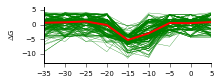

In [65]:
input_genelist = enough_rpc_df[high_dependent]['gene']
color_trajectory = 'green'
color_average = 'red'
outputfile = 'sphere_line_Amut_high.pdf'

fig, ax = plt.subplots()
#fig.set_dpi(500)
fig.set_size_inches(3, 1) 
ax = trajectory(input_genelist,color_trajectory,color_average)
#plt.savefig(outputfile, dpi=500, bbox_inches="tight", pad_inches=0.0)

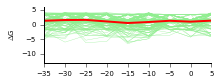

In [66]:
input_genelist = enough_rpc_df[low_dependent]['gene']
color_trajectory = 'lightgreen'
color_average = 'red'
outputfile = 'sphere_line_Amut_low.pdf'

fig, ax = plt.subplots()
#fig.set_dpi(500)
fig.set_size_inches(3, 1) 
ax = trajectory(input_genelist,color_trajectory,color_average)
#plt.savefig(outputfile, dpi=500, bbox_inches="tight", pad_inches=0.0)

-35___0.03125
-30___0.0078125
-25___0.01171875
-20___0.05859375
-15___0.69140625
-10___0.15625
-5___0.0078125
0___0.01171875
5___0.0234375


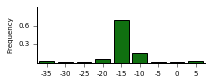

In [67]:
input_genelist = enough_rpc_df[high_dependent]['gene']
color_here = 'green'
outputfile = 'sphere_peak_Amut_high.pdf'

fig, ax = plt.subplots()
#fig.set_dpi(500)
fig.set_size_inches(3, 1) 
ax = peak_plot(input_genelist,color_here)
#plt.savefig(outputfile, dpi=500, bbox_inches="tight", pad_inches=0.0)

-35___0.160377358491
-30___0.0849056603774
-25___0.0801886792453
-20___0.103773584906
-15___0.165094339623
-10___0.150943396226
-5___0.103773584906
0___0.0566037735849
5___0.0943396226415


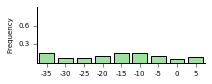

In [68]:
input_genelist = enough_rpc_df[low_dependent]['gene']
color_here = 'lightgreen'
outputfile = 'sphere_peak_Amut_low.pdf'

fig, ax = plt.subplots()
#fig.set_dpi(500)
fig.set_size_inches(3, 1) 
ax = peak_plot(input_genelist,color_here)
#plt.savefig(outputfile, dpi=500, bbox_inches="tight", pad_inches=0.0)

# O-mut

In [69]:
mut='O'
data_type = 'FD_TE_wt/'+mut
ks60_rpc = df_base_CDS['ks60_rpc'] > 0.05
ks65_rpc = df_base_CDS['ks65_rpc'] > 0.05
ks64_rpc = df_base_CDS['ks61_rpc'] > 0.05
ks68_rpc = df_base_CDS['ks66_rpc'] > 0.05
#outputfile = 'sphere_histo_Amut.pdf'

enough_rpc_df = df_base_CDS[ks60_rpc & ks65_rpc & ks64_rpc & ks68_rpc]

high_dependent = enough_rpc_df[data_type] >= enough_rpc_df[data_type].quantile(0.85)
theothers_up = enough_rpc_df[data_type] < enough_rpc_df[data_type].quantile(0.85)
theothers_bottom = enough_rpc_df[data_type] >= enough_rpc_df[data_type].quantile(0.15)
low_dependent  = enough_rpc_df[data_type] < enough_rpc_df[data_type].quantile(0.15)
print len(enough_rpc_df)
print len(enough_rpc_df[high_dependent])
print len(enough_rpc_df[theothers_up & theothers_bottom])
print len(enough_rpc_df[low_dependent])

2377
357
1663
357


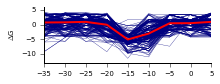

In [70]:
input_genelist = enough_rpc_df[high_dependent]['gene']
color_trajectory = 'navy'
color_average = 'red'
outputfile = 'sphere_line_Omut_high.pdf'

fig, ax = plt.subplots()
#fig.set_dpi(500)
fig.set_size_inches(3, 1) 
ax = trajectory(input_genelist,color_trajectory,color_average)
#plt.savefig(outputfile, dpi=500, bbox_inches="tight", pad_inches=0.0)

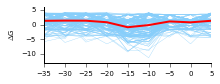

In [71]:
input_genelist = enough_rpc_df[low_dependent]['gene']
color_trajectory = 'lightskyblue'
color_average = 'red'
outputfile = 'sphere_line_Omut_low.pdf'

fig, ax = plt.subplots()
#fig.set_dpi(500)
fig.set_size_inches(3, 1) 
ax = trajectory(input_genelist,color_trajectory,color_average)
#plt.savefig(outputfile, dpi=500, bbox_inches="tight", pad_inches=0.0)

-35___0.0284810126582
-30___0.00949367088608
-25___0.00632911392405
-20___0.0411392405063
-15___0.705696202532
-10___0.183544303797
-5___0.0126582278481
0___0.00316455696203
5___0.00949367088608


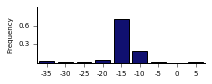

In [72]:
input_genelist = enough_rpc_df[high_dependent]['gene']
color_here = 'navy'
outputfile = 'sphere_peak_Omut_high.pdf'

fig, ax = plt.subplots()
#fig.set_dpi(500)
fig.set_size_inches(3, 1) 
ax = peak_plot(input_genelist,color_here)
#plt.savefig(outputfile, dpi=500, bbox_inches="tight", pad_inches=0.0)

-35___0.103448275862
-30___0.0724137931034
-25___0.0724137931034
-20___0.0931034482759
-15___0.296551724138
-10___0.148275862069
-5___0.0965517241379
0___0.0551724137931
5___0.0620689655172


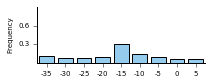

In [73]:
input_genelist = enough_rpc_df[low_dependent]['gene']
color_here = 'lightskyblue'
outputfile = 'sphere_peak_Omut_low.pdf'

fig, ax = plt.subplots()
#fig.set_dpi(500)
fig.set_size_inches(3, 1) 
ax = peak_plot(input_genelist,color_here)
#plt.savefig(outputfile, dpi=500, bbox_inches="tight", pad_inches=0.0)

# S-mut

In [74]:
mut='S'
data_type = 'FD_TE_wt/'+mut
ks60_rpc = df_base_CDS['ks60_rpc'] > 0.05
ks65_rpc = df_base_CDS['ks65_rpc'] > 0.05
ks64_rpc = df_base_CDS['ks62_rpc'] > 0.05
ks68_rpc = df_base_CDS['ks67_rpc'] > 0.05
#outputfile = 'sphere_histo_Amut.pdf'

enough_rpc_df = df_base_CDS[ks60_rpc & ks65_rpc & ks64_rpc & ks68_rpc]

high_dependent = enough_rpc_df[data_type] >= enough_rpc_df[data_type].quantile(0.85)
theothers_up = enough_rpc_df[data_type] < enough_rpc_df[data_type].quantile(0.85)
theothers_bottom = enough_rpc_df[data_type] >= enough_rpc_df[data_type].quantile(0.15)
low_dependent  = enough_rpc_df[data_type] < enough_rpc_df[data_type].quantile(0.15)
print len(enough_rpc_df)
print len(enough_rpc_df[high_dependent])
print len(enough_rpc_df[theothers_up & theothers_bottom])
print len(enough_rpc_df[low_dependent])


2286
343
1599
343


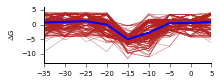

In [75]:
input_genelist = enough_rpc_df[high_dependent]['gene']
color_trajectory = 'firebrick'
color_average = 'blue'
outputfile = 'sphere_line_Smut_high.pdf'

fig, ax = plt.subplots()
#fig.set_dpi(500)
fig.set_size_inches(3, 1) 
ax = trajectory(input_genelist,color_trajectory,color_average)
#plt.savefig(outputfile, dpi=500, bbox_inches="tight", pad_inches=0.0)

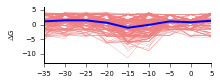

In [76]:
input_genelist = enough_rpc_df[low_dependent]['gene']
color_trajectory = 'lightcoral'
color_average = 'blue'
outputfile = 'sphere_line_Smut_low.pdf'

fig, ax = plt.subplots()
#fig.set_dpi(500)
fig.set_size_inches(3, 1) 
ax = trajectory(input_genelist,color_trajectory,color_average)
#plt.savefig(outputfile, dpi=500, bbox_inches="tight", pad_inches=0.0)

-35___0.0225080385852
-30___0.0128617363344
-25___0.0096463022508
-20___0.048231511254
-15___0.700964630225
-10___0.163987138264
-5___0.0064308681672
0___0.0096463022508
5___0.0257234726688


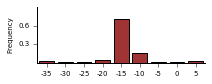

In [77]:
input_genelist = enough_rpc_df[high_dependent]['gene']
color_here = 'firebrick'
outputfile = 'sphere_peak_Smut_high.pdf'

fig, ax = plt.subplots()
#fig.set_dpi(500)
fig.set_size_inches(3, 1) 
ax = peak_plot(input_genelist,color_here)
#plt.savefig(outputfile, dpi=500, bbox_inches="tight", pad_inches=0.0)

-35___0.103571428571
-30___0.0571428571429
-25___0.075
-20___0.132142857143
-15___0.303571428571
-10___0.146428571429
-5___0.0821428571429
0___0.05
5___0.05


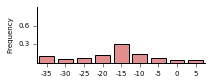

In [78]:
input_genelist = enough_rpc_df[low_dependent]['gene']
color_here = 'lightcoral'
outputfile = 'sphere_peak_Smut_low.pdf'

fig, ax = plt.subplots()
#fig.set_dpi(500)
fig.set_size_inches(3, 1) 
ax = peak_plot(input_genelist,color_here)
#plt.savefig(outputfile, dpi=500, bbox_inches="tight", pad_inches=0.0)